# 순환 신경망 (RNN, Recurrent Neural Network)
< 정의 >
- 입력과 출력을 시퀀스 단위로 처리하는 가장 기본적인 인공 신경망 시퀀스(Sequence) 모델
    - LSTM이나 GRU 또한 근본적으로 RNN에 속함
    - 재귀 신경망(Recursive Neural Network) : 용어는 비슷하지만 순환 신경망과 전혀 다른 개념
        
< FFNN VS RNN >
- FFNN (순방향 신경망)
    - 단위 : 뉴런 개수
    - 입력층 -> 출력층의 방향으로 연산이 전개되는 신경망
- RNN (순환 신명망)
    - 단위 : 입력 벡터 / 출력 벡터 / 은닉 상태의 차원 개수
    - 입력층 <-> 출력층 양방향 연산이 전개되는 신경망 
 

< 특징 >
- 1. 은닉층의 메모리 셀의 재귀적 활동 (입력층 <-> 출력층 양방향 연산)
    - 은닉층의 RNN Cell은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 RNN Cell에서 나온 값을 자신의 입력으로 사용
    - 현재 시점 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용
        - 메모리 셀 (RNN cell)
            - RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
            - 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행
        - 은닉 상태 (hidden state)
            - 메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값
    - 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보냄
        - <-> 피드 포워드 신경망(Feed Forward Neural Network) : 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 보냄


- 2. 다양한 입출력의 길이
    - 입력과 출력의 길이를 다르게 설계할 수 있므로 다양한 용도로 사용 가능
    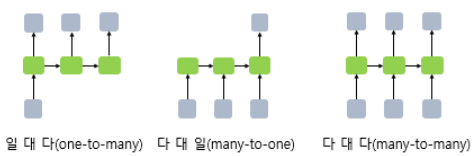
    - 1. 일대다 (one-to-many)
        - 한 개의 입력에 대한 여러 개의 출력
        - ex) 이미지 캡셔닝(Image Captioning) 작업
            - 하나의 이미지 입력에 대해서 사진의 제목을 출력하기
            - 사진의 제목은 단어들의 나열이므로 시퀀스 출력
    - 2. 다대일 (many-to-one)
        - 여러 개의 입력에 대한 한 개의 출력
        - ex) 텍스트 분류 작업
            - 감성 분류(sentiment classification) : 입력 문서가 긍정적인지 부정적인지 판별
            - 스팸 메일 분류(spam detection) : 메일이 정상 메일인지 스팸 메일인지 판별
    - 3. 다대다 (many-to-many)
        - 여러 개의 입력에 대한 여러 개의 출력
            - ex) 챗봇 : 사용자가 문장을 입력하면 대답 문장을 출력
            - ex) 번역기 : 입력 문장으로부터 번역된 문장을 출력
        - 태깅 작업
            - ex) 개체명 인식
            - ex) 품사 태깅

< 수식 >
- h(t) : 현재 시점 t에서의 은닉 상태값
- 은닉층의 메모리 셀은 ht를 계산하기 위해 총 두 개의 가중치를 가짐
    - W(x) : 입력층을 위한 가중치
    - W(h) : 이전 시점 t-1의 은닉 상태값인 h(t-1)을 위한 가중치
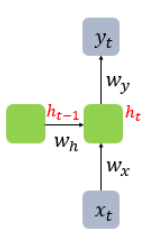
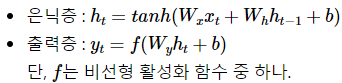

< 은닉층 >
- 은닉상태값 h(t)를 계산하기 위한 활성화 함수
    - : 주로 하이퍼볼릭탄젠트 함수(tanh) 사용
- 각각의 가중치 W(x), W(y), W(z)의 값
    - : 하나의 층에서는 모든 시점에서 값을 동일하게 공유
    - 하지만 은닉층이 2개 이상일 경우에는 각 은닉층에서의 가중치는 서로 다름
< 출력층 >
- 결과값 y(t)를 계산하기 위한 활성화 함수
    - 이진 분류 : 시그모이드 함수 -> 로지스틱 회귀
    - 다지 분류 : 소프트맥스 함수 -> 스프트맥스 회귀

## keras로 RNN 구현하기
< 은닉층 코드 >
- model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
- model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))
    - hidden_units : 은닉 상태의 크기를 정의
        - = output_dim (메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기)
        - RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가짐
    - timesteps : 입력 시퀀스의 길이
        - = input_length : 입력 시점의 수
    - input_dim : 입력의 크기

 < 입력 >
- 3D 텐서 : batch_size, timesteps, input_dim
    - batch_size : 한 번에 학습하는 데이터의 개수
    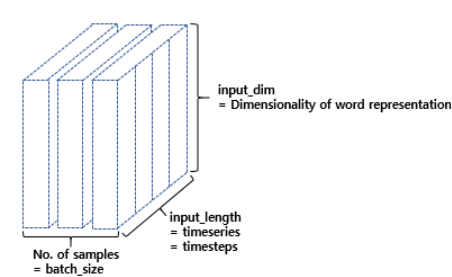
    
< 출력 >
- 1. 2D 텐서 : batch_size, output_dim
    - 메모리 셀의 최종 시점의 은닉 상태만을 리턴하는 경우
    - 다대일 (many-to-one)
- 2. 3D 텐서 : batch_size, timesteps, output_dim
    - 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하는 경우
    - RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정
    - 다대다 (many-to-man)
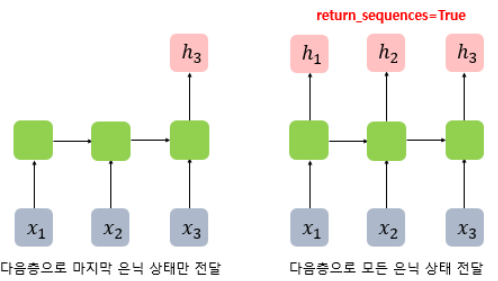
- batch_size : 한 번에 학습하는 데이터의 개수
- output_dim = hidden_units = 은닉 상태의 크기 = 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기

In [ ]:
# RNN층 추가하는 기본 코드
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

In [1]:
# 2D 텐서 리턴하는 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

# 출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때 (None, 3)
# batch_size = 현 단계에서는 알 수 없으므로 None
# output_dim = hidden_units의 값인 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [2]:
# 2D 텐서 리턴하는 모델 만들기
# batch_size 미리 정의한 경우
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

# batch_size를 8로 기재하면 출력의 크기가 (8, 3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 3D 텐서 리턴하는 모델 만들기
# return_sequences=True
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

# 출력의 크기가 (8, 2, 3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


## numpy로 RNN 구현하기
- 각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산
    - hidden_state_t = t 시점의 은닉 상태
    - input_length = 입력 데이터의 길이 = 총 시점의 수(timesteps)
    - input_t = t 시점의 입력값
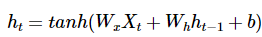

In [ ]:
# 아래의 코드는 가상의 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.

In [6]:
# 초기 은닉 상태 출력하기
import numpy as np

timesteps = 10 # 시점의 수 (문장의 길이)
input_dim = 4 # 입력의 차원 (단어 벡터의 차원)
hidden_units = 8 # 은닉 상태의 크기 (메모리 셀의 용량)

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [9]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

    # Wx * Xt + Wh * Ht-1 + b(bias)
    output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

    # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
    # 각 시점의 은닉 상태의 값을 계속해서 누적
    total_hidden_states.append(list(output_t))
    hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.99999073 0.99963544 0.99998116 0.99998411 0.99998324 0.99979158
  0.99998837 0.99999472]
 [0.99998528 0.999551   0.99996037 0.99995127 0.99998192 0.999859
  0.99997854 0.99998568]
 [0.99998544 0.99948384 0.99996956 0.9999766  0.99998281 0.99972483
  0.99997678 0.99999208]
 [0.99998548 0.999547   0.9999742  0.99997255 0.99998812 0.99985524
  0.99998607 0.99999499]
 [0.9999823  0.99948112 0.99996696 0.99996697 0.99998786 0.99983679
  0.99997956 0.9999937 ]
 [0.9999892  0.99962304 0.99998277 0.99997785 0.99998847 0.99988618
  0.99999329 0.99999645]
 [0.99995898 0.99867568 0.99990636 0.99991123 0.99997563 0.99952146
  0.99992986 0.9999669 ]
 [0.99999163 0.99972447 0.9999819  0.99996974 0.99998665 0.99993043
  0.99999411 0.99999445]
 [0.99998795 0.99958836 0.99997309 0.9999733  0.99998365 0.99982753
  0.9999841  0.99999221]
 [0.99999119 0.99961809 0.99998514 0.99998359 0.99998392 0.99982236
  0.99999386 0.99999576]]


## 깊은 순환 신경망 (Deep Recurrent Neural Network)
- 다수의 은닉층을 가진 순환 신경망
- 첫번째 은닉층 코드 작성시 
    - 다음 은닉층이 존재하므로 return_sequences = True를 설정하여
    - 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내주어야 함
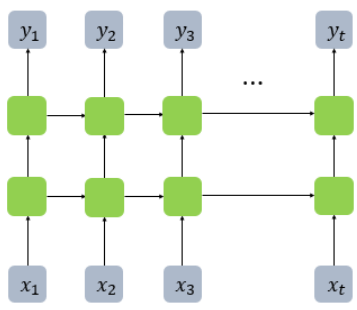

In [12]:
model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 10, 8)             112       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 10, 8)             136       
                                                                 
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


## 양방향 순환 신경망 (Bidirectional Recurrent Neural Network)

< 정의 >
- 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 할 수 있도록 고안된 RNN
    - 시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여할 수 있음

< 특징 >
- 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용
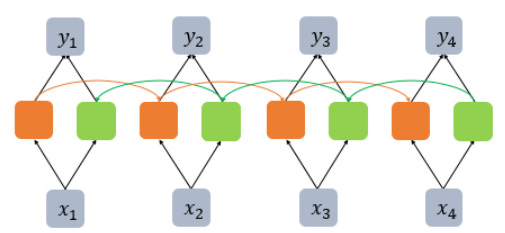
    아래의 두 값 모두 출력값을 예측하기 위해 사용됨
    - 1. 첫 번째 메모리 셀
        - 주황색 메모리 셀
        - 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산
    - 2. 두 번째 메모리 셀
        - 초록색 메모리 셀
        - 뒤 시점의 은닉 상태(Backward States)를 전달받아 현재의 은닉 상태를 계산

In [10]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 16)           224       
 l)                                                              
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


## 깊은 양방향 순환 신경망 (Deep Bidirectional Recurrent Neural Network)
- 다수의 은닉층을 가진 양방향 순환 신경망
- 은닉층 코드 작성시
    - 다음 은닉층이 존재하므로 return_sequences = True를 설정하여
    - 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내주어야 함
    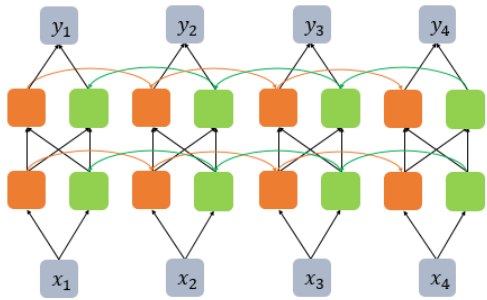

In [11]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 10, 16)           224       
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
Total params: 1,424
Trainable params: 1,424
Non-traina

### 점검 퀴즈
- 모델에 대한 설명이 다음과 같을 때, 총 파라미터 개수를 구해보세요.
1. Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다.
2. 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
3. 훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
4. 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
5. 은닉층은 1개입니다.

<pre>
hidden_units =128
timesteps = 5000
input_dim = 100

(5000 * 100) + (100 * 128) + (128 * 128) + (128) + (128 * 1) + (1) = 259,441

Embedding = 5,000(input) * 100(embedding) = 500,000
Wx = 100(embedding) * 128(hidden) = 12,800
Wh = 128 * 128 = 16,384
bias(hidden)  = 128
Wy = 128 * 1 = 128
bias(output) = 1

total = 529,441
</pre>

# 장단기 메모리 (LSTM, Long Short-Term Memory)

< 바닐라 RNN >
- 정의
    - = SimpleRNN
    - 전통적인 RNN
- 한계
    - 장기 의존성 문제(the problem of Long-Term Dependencies)
        - 출력 결과가 이전의 계산 결과에 의존하다보니
        - 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이며
        - 바닐라 RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생
 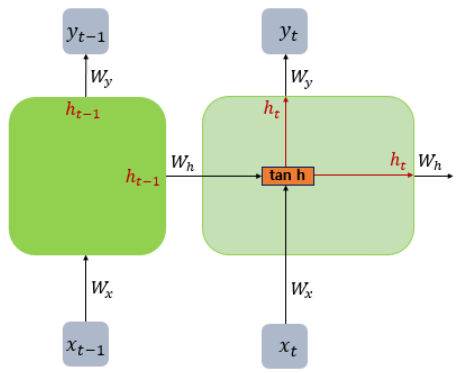
 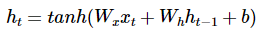
 
< LSTM >
 - 정의
     - 바닐라 RNN의 한계를 극복하기 위해 변형된 RNN
     - 긴 시퀀스의 입력을 처리하는데 탁월
 - 특징
     - 1. LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합
         - 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며
         - 셀 상태(cell state)라는 값을 추가
             - C(t) = t시점의 셀 상태
             - 아래 그림에서 왼쪽에서 오른쪽으로 가는 굵은 선
             ----------C(t-1)-----------x----------+------------C(t)-----------
              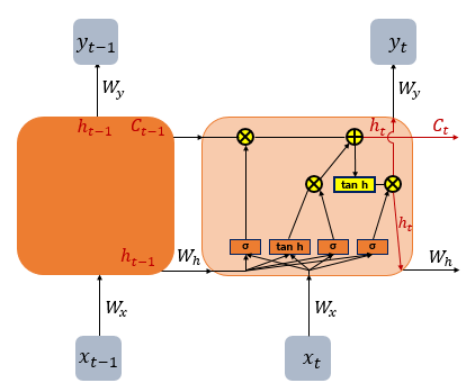
     - 2. 3개의 게이트에는 공통적으로 시그모이드 함수가 존재하며, 시그모이드 함수(σ)를 지나 결과로 나온 0~1 사이의 값들로 게이트를 조절함
         - 1. 입력 게이트
             - 현재 정보를 기억하기 위한 게이트
             - i(t) = 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 W(xi)를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 W(hi)를 곱한 값을 더하여 시그모이드 함수(σ)를 지난 것으로 0과 1사이의 값을 가짐
             - g(t) = 현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 W(xg)를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 W(hg)를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수(tanh)를 지난 것으로 -1과 1사이의 값을 가짐
             - i(t)와 g(t) 두 개의 값을 가지고 기억할 정보의 양을 결정
             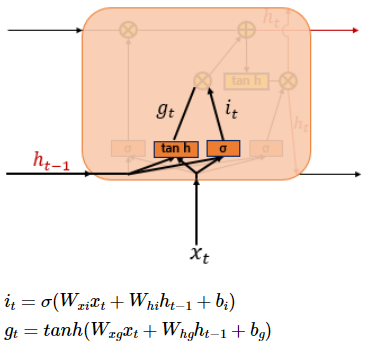
         - 2. 삭제 게이트
             - 기억을 삭제하기 위한 게이트
             - 삭제 과정을 거친 정보의 양 = 시그모이드 함수를 지나 나온 0과 1사이의 값
                 - 0에 가까울수록 정보가 많이 삭제된 것
                 - 1에 가까울수록 정보를 온전히 기억한 것
             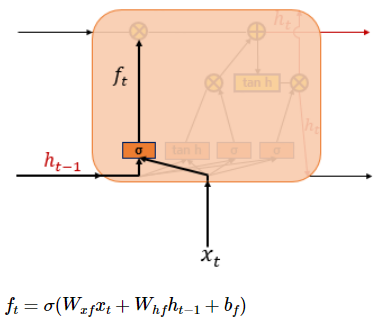
         - 3. 출력 게이트
             - 현재 시점 t의 은닉 상태를 결정하기 위한 게이트
             - 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값
    - 3. 셀 상태 C(t)
        - 현재 시점 t의 셀 상태 = 삭제 게이트의 결과값 + 입력 게이트에서 선택된 기억의 결과값
            - 삭제 게이트 : 이전 시점의 입력을 얼마나 반영할지를 의미
            - 입력 게이트 : 현재 시점의 입력을 얼마나 반영할지를 결정
        - 다음 t+1 시점의 LSTM 셀 또는 출력층으로 넘어감
        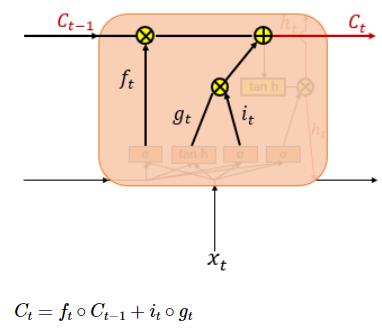
    - 4. 은닉 상태 h(t)
        - 현재 시점 t의 은닉 상태 = 셀 상태 C(t)가 하이퍼볼릭탄젠트 함수를 지난 -1~+1 사이의 값 * 출력 게이트의 결과값
         - 값이 걸러지는 효과가 발생하여 은닉 상태가 되며
         - 다음 t+1 시점의 LSTM 셀 또는 출력층으로 넘어감
         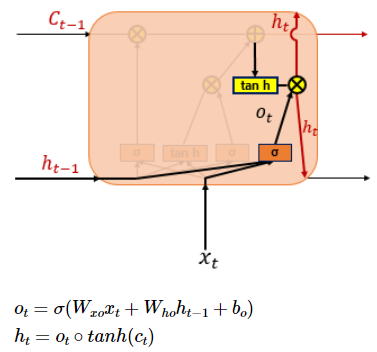

# 게이트 순환 유닛 (GRU, Gated Recurrent Unit)
< 정의 >
- LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄인 것
- LSTM과 유사한 성능을 가지면서 동시에 복잡했던 LSTM의 구조를 간단화

< 특징 >
- 2개의 게이트가 존재 : 업데이트 게이트와 리셋 게이트
    - <-> LSTM은 3개의 게이트가 존재 : 출력, 입력, 삭제 게이트
- LTSM보다 빠른 학습 속도
    - 데이터 양이 적을 때 : 매개 변수의 양이 적은 GRU가 조금 더 낫고
    - 데이터 양이 많을 때 : LSTM이 더 낫다

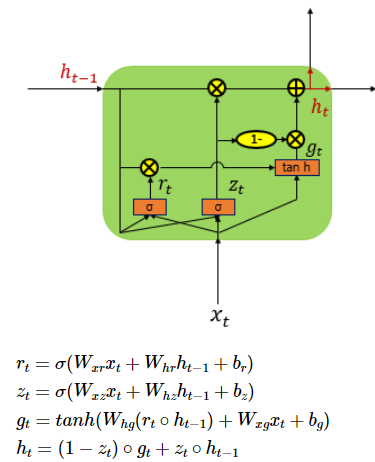

## keras를 이용한 GRU 구현

In [ ]:
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

# keras의 SimpleRNN vs LSTM

In [13]:
# 단어 벡터의 차원 = 5 / 문장의 길이 = 4
# 즉, 4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용되는 것
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

# RNN은 2D 텐서가 아니라 3D 텐서를 입력 받는다
# 따라서 배치 크기 1을 추가하여 2D -> 3D 텐서로 변경하여 해결하기
# train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

# (batch_size, timesteps, input_dim)에 해당되는 (1, 4, 5)의 크기를 가지는 3D 텐서가 생성됨

(1, 4, 5)


## SimpleRNN
- 실제로 SimpleRNN이 사용되는 경우는 거의 없으며, LSTM과 GRU가 주로 사용됨
- return_sequences
    - = True : 모든 시점의 은닉 상태를 출력
    - = False : 마지막 시점의 은닉 상태만 출력
- return_state = 
    - = True : return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력
        - 만약 return_sequences가 True이면서, return_state를 True로 할 경우
            - SimpleRNN은 두 개의 출력을 리턴함
                - 첫번째 출력 :  return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태
                - 두번째 출력 : return_state=True로 인한 출력으로 마지막 시점의 은닉 상태
        - 만약 return_sequences가 False이면서, return_state를 True로 할 경우
            - 두 개의 출력 모두 마지막 시점의 은닉 상태를 출력

In [14]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

# 은닉상태의 크기 = 3
# (1, 3) 크기의 텐서가 출력되는데, 이는 마지막 시점의 은닉 상태

hidden state : [[-0.40566945  0.17233457  0.99582964]], shape: (1, 3)


In [15]:
# return_sequences=True
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

# 시점(timesteps) = 4
# 모든 시점에 대한 은닉 상태의 값 출력하므로
# (1, 4, 3) 크기의 텐서가 출력된 것

hidden states : [[[ 0.10422342  0.690674   -0.9993022 ]
  [ 0.37162223  0.8602422  -0.9971952 ]
  [ 0.02258334  0.90110976 -0.5932905 ]
  [ 0.9528792   0.97560364 -0.9967322 ]]], shape: (1, 4, 3)


In [16]:
# return_sequences=True
# return_state=True

rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

# 첫번째 출력은 return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태 =  (1, 4, 3) 
# 두번째 출력은 return_state=True로 인한 출력으로 마지막 시점의 은닉 상태 = (1, 3)

hidden states : [[[-0.72427124  0.9996239  -0.99563324]
  [ 0.85810447  0.9989696  -0.9655234 ]
  [-0.14099006  0.99527967 -0.9281405 ]
  [ 0.771138    0.9965412  -0.9325942 ]]], shape: (1, 4, 3)
last hidden state : [[ 0.771138   0.9965412 -0.9325942]], shape: (1, 3)


In [17]:
# return_sequences=False
# return_state=True

rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

# 두 개의 출력 모두 마지막 시점의 은닉 상태인 (1, 3)을 출력

hidden state : [[-0.7954369  -0.9907551  -0.85119087]], shape: (1, 3)
last hidden state : [[-0.7954369  -0.9907551  -0.85119087]], shape: (1, 3)


## LSTM 이해하기
- return_state = True인 경우
    - return_sequences의 True/False 여부와 상관 없이
    - 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환

In [18]:
# return_sequences=False
# return_state=True

lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

# 첫번째 결과는 return_sequences=False에 따른 마지막 시점의 은닉 상태
# 두번째 결과는 마지막 시점의 은닉 상태
# 세번째 결과는 마지막 시점의 셀 상태

hidden state : [[-0.23506685 -0.22311497 -0.824282  ]], shape: (1, 3)
last hidden state : [[-0.23506685 -0.22311497 -0.824282  ]], shape: (1, 3)
last cell state : [[-0.77056223 -0.4493183  -1.6073283 ]], shape: (1, 3)


In [19]:
# return_sequences=True
# return_state=True

lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

# 첫번째 결과는 return_sequences=True에 따른 모든 시점의 은닉 상태
# 두번째 결과는 마지막 시점의 은닉 상태
# 세번째 결과는 마지막 시점의 셀 상태

hidden states : [[[-0.22276436  0.17017086  0.03179636]
  [ 0.08181795  0.20643926  0.07720464]
  [ 0.2970536   0.09680505  0.13905312]
  [-0.02956106  0.1663969   0.28356668]]], shape: (1, 4, 3)
last hidden state : [[-0.02956106  0.1663969   0.28356668]], shape: (1, 3)
last cell state : [[-0.05759761  0.23838192  0.4760437 ]], shape: (1, 3)


## 양방향 LSTM 이해하기
- Bidirectional LSTM의 출력값 확인하기
- return_state가 True인 경우
    - 정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태 4가지를 반환
    - 다만, 셀 상태는 각각 forward_c와 backward_c 또는 forward_h와 backward_h에 저장만 하고 출력하지 않음
    - return_sequences가 False인 경우
        - 정방향 LSTM의 마지막 시점의 은닉 상태와
        - 역방향 LSTM의 첫번째 시점의 은닉 상태가
        - 연결된 채 반환됨
        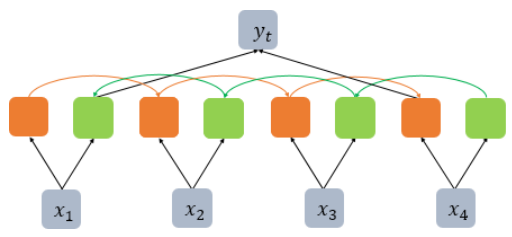
    - return_sequences가 True인 경우
        - 역방향 LSTM의 첫번째 시점의 은닉 상태는
        - 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라
        - 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됨
        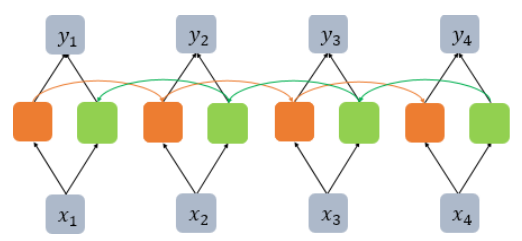

In [20]:
# 출력되는 은닉 상태의 값을 고정시키기
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [ ]:
# return_sequences가 False이고, return_state가 True인 경우

bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

# 5개의 값을 반환
# 첫번째 출력값의 크기는 (1, 6)
# return_sequences가 False인 경우, 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환되기 때문

In [22]:
# return_sequences가 Ture이고, return_state가 True인 경우

bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

# 5개의 값을 반환
# 첫번째 출력값의 크기는 (1, 4, 6)
# 은닉 상태의 값인 forward_h와 backward_h는 각각 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태값
# 이 두 값을 연결한 값이 hidden_states에 출력되는 값
# 역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됩

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


# RNN 언어 모델 (RNNLM, Recurrent Neural Network Language Model)
< 특징 >
- 1. 시점(time step)이 있으므로 입력의 길이를 고정하지 않아도 됨
    - n-gram 언어 모델과 NNLM은 고정된 개수의 단어만을 입력으로 받아야한다는 단점이 있었음
- 2. 교사 강요(teacher forcing)라는 훈련기법을 사용
    - 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법
    - 1. 훈련 과정
        - 이전 시점의 예측 결과를 다음 시점의 입력으로 사용하면서 예측하는 것이 아님
        - 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고, t 시점의 레이블. 즉, 실제 알고있는 정답을 t+1 시점의 입력으로 사용
            -  what will the fat cat sit on라는 훈련 샘플이 있다면
            - what will the fat cat sit 시퀀스를 모델의 입력으로 넣으면
            - will the fat cat sit on를 예측하도록 훈련됨
        - 출력층의 활성화 함수 : 소프트맥스 함수
        - 손실함수 : 크로스 엔트로피 함수
    - 2. 테스트 과정
        - 이전 시점의 예측 결과를 다음 시점의 입력으로 사용하면서 예측함
            - what을 입력받으면, will을 예측
            - will은 다음 시점의 입력이 되어 the를 예측
            - the는 다음 시점의 입력이 되어 fat을 예측
            - fat는 다음 시점의 입력이 되어 cat을 예측
                - 결과적으로 네 번째 시점의 cat은 앞서 나온 what, will, the, fat이라는 시퀀스로 인해 결정된 단어임


# RNN을 이용한 텍스트 생성 (Text Generation using RNN)
- 다 대 일(many-to-one) 구조의 RNN을 사용하여 문맥을 반영해서 텍스트를 생성하는 모델을 만들기

## 데이터 전처리

### 단어 집합 생성

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만, 패딩을 위한 0을 고려하여 +1을 해준 것
print('단어 집합의 크기 : %d' % vocab_size)
print(tokenizer.word_index)

단어 집합의 크기 : 12
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


### 훈련 데이터 생성

In [25]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))
print(sequences)

# [2, 3]은 [경마장에, 있는]에 해당되며 [2, 3, 1]은 [경마장에, 있는, 말이]에 해당

# 아직 레이블로 사용될 단어를 분리하지 않은 훈련 데이터임
# 전체 훈련 데이터에 대해서 맨 우측에 있는 단어에 대해서만 레이블로 분리해야 함

학습에 사용할 샘플의 개수: 11
[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


### 패딩

In [26]:
# 패딩 : 전체 샘플에 대해 가장 긴 샘플의 길이를 기준으로 일치시켜주기
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)

샘플의 최대 길이 : 6
[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


### 레이블 분리

In [27]:
# 각 샘플의 마지막 단어를 레이블 (정답, 실제값 y)로 분리하기

sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

print(X)
print(y)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


### 레이블 원-핫 인코딩

In [28]:
# 레이블에 대한 원-핫 인코딩 수행
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## RNN 모델 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

embedding_dim = 10 # 임베딩 벡터의 차원은 10
hidden_units = 32 # 은닉 상태의 크기는 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

# 다 대 일 구조의 RNN을 사용
# 전결합층(Fully Connected Layer)을 출력층으로 단어 집합 크기만큼의 뉴런을 배치하여 모델을 설계
# 해당 모델은 마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측하는 다중 클래스 분류 문제를 수행하는 모델
# 다중 클래스 분류 문제의 경우, 출력층에 소프트맥스 회귀를 사용해야하므로 활성화 함수로는 소프트맥스 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용하여 200 에포크를 수행gka

## 예측

In [ ]:
# 문장 생성 함수 만들기
# 입력된 단어로부터 다음 단어를 예측해서 문장을 생성하는 함수

def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
# '경마장에' 라는 단어 뒤에는 총 4개의 단어가 있으므로 4번 예측해보기
print(sentence_generation(model, tokenizer, '경마장에', 4))
print(sentence_generation(model, tokenizer, '그의', 2))
print(sentence_generation(model, tokenizer, '가는', 5))

# LSTM을 이용한 텍스트 생성

## 데이터 로드

In [1]:
# 뉴욕 타임즈 기사의 제목 데이터

import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [2]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


## 데이터 전처리

### NULL값 확인하기

In [3]:
# NULL값 확인하기
print(df['headline'].isnull().values.any())

False


In [4]:
# 모든 신문 기사의 제목을 headline 열에서 뽑아 하나의 리스트로 저장
headline = []
# 헤드라인의 값들을 리스트로 저장
headline.extend(list(df.headline.values)) 
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

### 노이즈 데이터 제거
- Unknown 값을 가진 샘플을 제거

In [5]:
print('총 샘플의 개수 : {}'.format(len(headline)))

headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

headline[:5]

총 샘플의 개수 : 1324
노이즈값 제거 후 샘플의 개수 : 1214


['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

### 구두점 제거와 단어의 소문자화

In [6]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

### 단어 집합(vocabulary) 생성

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


### 정수 인코딩 및 훈련 데이터 생성

In [8]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

# [[99, 269], # former nfl
#  [99, 269, 371], # former nfl cheerleaders
#  [99, 269, 371, 1115], # former nfl cheerleaders settlement
#  [99, 269, 371, 1115, 582], # former nfl cheerleaders settlement offer
#  [99, 269, 371, 1115, 582, 52], # 'former nfl cheerleaders settlement offer 1
#  [99, 269, 371, 1115, 582, 52, 7], # former nfl cheerleaders settlement offer 1 and
#  [99, 269, 371, 1115, 582, 52, 7, 2], # ... 이하 생략 ...
#  [99, 269, 371, 1115, 582, 52, 7, 2, 372],
#  [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
#  [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116], # 모든 단어가 사용된 완전한 첫번째 문장
#  # 바로 위의 줄은 : former nfl cheerleaders settlement offer 1 and a meeting with goodell
#  [100, 3]] # epa to에 해당되며 두번째 문장이 시작됨.

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

### 인덱스로부터 단어 찾기

In [9]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


### 패딩

In [10]:
# 가장 긴 샘플의 길이인 24로 모든 샘플의 길이를 패딩하기
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

샘플의 최대 길이 : 24
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


### 레이블 분리

In [11]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

print(X[:3])
print(y[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]
[ 269  371 1115]


### 레이블 원-핫 인코딩 수행

In [12]:
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## RNN 모델 설계

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTMCell

embedding_dim = 10 # 임베딩 벡터의 차원은 10
hidden_units = 128 # 은닉 상태의 크기는 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

# 다 대 일 구조의 LSTM을 사용
# 전결합층(Fully Connected Layer)을 출력층으로 단어 집합 크기만큼의 뉴런을 배치하여 모델을 설계
# 해당 모델은 마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측하는 다중 클래스 분류 문제를 수행하는 모델
# 다중 클래스 분류 문제의 경우, 출력층에 소프트맥스 회귀를 사용해야 하므로 활성화 함수로는 소프트맥스 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용하여 200 에포크를 수행함

NameError: name 'LSTM' is not defined

## 예측

In [ ]:
# 문장 생성 함수 만들기

def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
# 임의의 단어 'i'에 대해서 10개의 단어를 추가 생성하여 예측하기
print(sentence_generation(model, tokenizer, 'i', 10))
print(sentence_generation(model, tokenizer, 'how', 10))

# 문자 단위 RNN (Char RNN)
- 이전 시점의 예측 문자를 다음 시점의 입력으로 사용하는 모델
    - 지금까지 배운 RNN은 전부 입력과 출력의 단위가 단어 벡터였음
    - 하지만 입출력의 단위를 단어 레벨(word-level)에서 문자 레벨(character-level)로 변경하여 RNN을 구현 가능
    - 따라서 임베딩층(embedding layer)을 사용하지 않음

## 문자 단위 RNN 언어 모델 (Char RNNLM)
- 문자 단위 RNN을 다 대 다(Many-to-Many) 구조로 구현

### 데이터 로드 및 전처리
-  '이상한 나라의 앨리스(Alice’s Adventures in Wonderland)'라는 고전소설 다운로드
- 특수문자를 제거 및 단어 소문자화

In [15]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [16]:
sentences[:5]
# 문장 토큰화가 된 상태가 아님

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [17]:
# 하나의 문자열로 통합하기
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))
print(total_data[:200])

문자열의 길이 또는 총 문자의 개수: 159484
the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


### 문자 집합 생성
- 기존에는 중복을 제거한 단어들의 모음인 단어 집합(vocabulary)을 만들었으나
- 이번에 만들 집합은 단어 집합이 아니라 문자 집합

In [18]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

# 영어가 훈련 데이터일 때 문자 집합의 크기는 단어 집합을 사용했을 경우보다 집합의 크기가 현저히 작음
# 아무리 훈련 코퍼스에 수십만 개 이상의 많은 영어 단어가 존재한다고 하더라도, 영어 단어를 표현하기 위해서 사용되는 문자는 26개의 알파벳뿐이기 때문
# 만약 훈련 데이터의 알파벳이 대, 소문자가 구분된 상태라고 하더라도 모든 영어 단어는 총 52개의 알파벳으로 표현 가능함

# 어떤 방대한 양의 텍스트라도 집합의 크기를 적게 가져갈 수 있다는 것은 구현과 테스트를 굉장히 쉽게 할 수 있다는 이점을 가지므로, RNN의 동작 메커니즘 이해를 위한 토이 프로젝트 용도로 유용

문자 집합의 크기 : 56


### 정수 인코딩

In [19]:
# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

# 정수 0부터 28까지는 공백을 포함한 각종 구두점, 특수문자가 존재하며
# 정수 29부터 54까지는 a부터 z까지 총 26개의 알파벳 소문자가 문자 집합에 포함되어 있음

문자 집합 : {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


### 정수로부터 문자 찾기

In [20]:
# 정수로부터 문자를 리턴하는 index_to_char 만들기
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

### 훈련 데이터 생성
- 문장 샘플의 길이를 정하고, 해당 길이만큼 문자열 전체를 등분하는 것

< 예시 >
- 훈련 데이터에 apple이라는 시퀀스가 있고, 입력의 길이를 4라고 정하였을 때 데이터의 구성은 어떻게 될까요?
    - 입력의 길이가 4이므로 입력 시퀀스와 예측해야 하는 출력 시퀀스 모두 길이는 4가 됩니다.
    - 다시 말해 RNN은 총 네 번의 시점을(timestep)을 가질 수 있다는 의미입니다.
        - apple은 다섯 글자이지만 입력의 길이는 4이므로 'appl'까지만 입력으로 사용할 수 있습니다.
        - 그리고 언어 모델은 다음 시점의 입력을 예측해야하는 모델이므로 'pple'를 예측하도록 데이터가 구성됩니다.
            - appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
            - train_X = 'appl'
            - train_y = 'pple'

In [21]:
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2658


In [22]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [23]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

# train_y[0]은 train_X[0]에서 오른쪽으로 한 칸 쉬프트 된 문장임

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

In [24]:
print(train_X[1])
print(train_y[1])

# train_y[1]은 train_X[1]에서 오른쪽으로 한 칸 쉬프트 된 문장임

[43, 33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54]
[33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54, 52]


### 원-핫 인코딩 수행
- 임베딩층(embedding layer)을 사용하지 않을 것이므로, 입력 시퀀스인 train_X에 대해서도 원-핫 인코딩을 수행하기

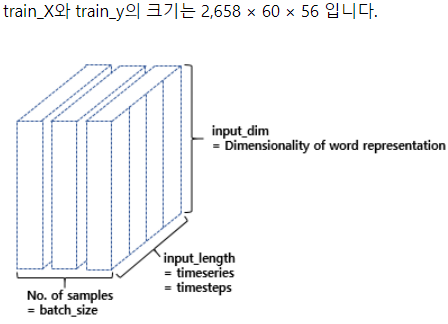
- 샘플의 수(No. of samples)가 2,658개, 입력 시퀀스의 길이(input_length)가 60, 각 벡터의 차원(input_dim)이 55임을 의미
- 원-핫 벡터의 차원은 문자 집합의 크기인 56이어야 하므로 원-핫 인코딩이 수행되었음을 알 수 있음

In [25]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


### RNN 모델 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

hidden_units = 256 # 은닉 상태의 크기는 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

# 모델은 다 대 다 구조의 LSTM을 사용
# LSTM 은닉층은 두 개를 사용
# 전결합층(Fully Connected Layer)을 출력층으로 문자 집합 크기만큼의 뉴런을 배치하여 모델을 설계
# 해당 모델은 모든 시점에서 모든 가능한 문자 중 하나의 문자를 예측하는 다중 클래스 분류 문제를 수행하는 모델
# 출력층에 소프트맥스 회귀를 사용해야 하므로 활성화 함수로는 소프트맥스 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용하여 80 에포크를 수행힘

Epoch 1/80
84/84 - 63s - loss: 3.0679 - accuracy: 0.1826 - 63s/epoch - 753ms/step
Epoch 2/80
84/84 - 56s - loss: 2.7415 - accuracy: 0.2455 - 56s/epoch - 663ms/step
Epoch 3/80
84/84 - 58s - loss: 2.3898 - accuracy: 0.3283 - 58s/epoch - 687ms/step
Epoch 4/80
84/84 - 57s - loss: 2.2549 - accuracy: 0.3599 - 57s/epoch - 681ms/step
Epoch 5/80
84/84 - 59s - loss: 2.1495 - accuracy: 0.3857 - 59s/epoch - 698ms/step
Epoch 6/80
84/84 - 57s - loss: 2.0660 - accuracy: 0.4055 - 57s/epoch - 681ms/step
Epoch 7/80


### 예측
- 특정 문자를 주면 다음 문자를 계속해서 생성해내는 sentence_generation 함수를 구현
- 인자로 학습한 모델 & 모델로 다음 문자를 몇 번 생성할 것인지 횟수를 전달해주면, 해당 함수는 임의로 시작 문자를 정한 뒤에 정해진 횟수만큼의 다음 문자를 지속적으로 예측하여 문장을 생성함

In [ ]:
def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [ ]:
result = sentence_generation(model, 100)
print(result)

## 문자 단위 RNN으로 텍스트 생성하기

### 데이터 로드 및 전처리

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical

raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [2]:
# 단락 구분을 없애고 하나의 문자열로 재저장
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


### 문자 집합 생성
- 기존에는 중복을 제거한 단어들의 모음인 단어 집합(vocabulary)을 만들었으나,
- 이번에 만들 집합은 단어 집합이 아니라 문자 집합

In [3]:
# 중복을 제거한 문자 집합 생성
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합 :',char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합 : [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 : 33


### 정수 인덱싱

In [4]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

# 알파벳의 대, 소문자를 구분하고 구두점과 공백을 포함함

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [5]:
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))
sequences[:10]

총 훈련 샘플의 수: 426


['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

### 정수로부터 문자 찾기

In [6]:
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 문자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)
    
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

### 레이블 분리

In [7]:
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

print(X_data[:5])
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]
[18 28 17  0 21]


### 원-핫 인코딩 수행
- X와 y에 대해 모두 원-핫 인코딩 수행하기
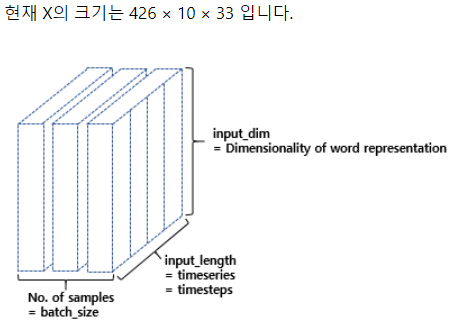
- 샘플의 수(No. of samples)가 426개, 입력 시퀀스의 길이(input_length)가 10, 각 벡터의 차원(input_dim)이 33임을 의미
- 원-핫 벡터의 차원은 문자 집합의 크기인 33이어야 하므로 X에 대해서 원-핫 인코딩이 수행되었음을 알 수 있음

In [8]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

print(X_data_one_hot.shape)

(426, 10, 33)


### RNN 모델 설계

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units = 64 # 은닉 상태의 크기는 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

# 모델은 다 대 일 구조의 LSTM을 사용
# 전결합층(Fully Connected Layer)을 출력층으로 문자 집합 크기만큼의 뉴런을 배치하여 모델을 설계
# 해당 모델은 마지막 시점에서 모든 가능한 문자 중 하나의 문자를 예측하는 다중 클래스 분류 문제를 수행하는 모델
# 다중 클래스 분류 문제의 경우, 출력층에 소프트맥스 회귀를 사용해야 하므로 활성화 함수로는 소프트맥스 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용하여 100 에포크를 수행함

Epoch 1/100
14/14 - 5s - loss: 3.4743 - accuracy: 0.0657 - 5s/epoch - 358ms/step
Epoch 2/100
14/14 - 0s - loss: 3.3512 - accuracy: 0.1995 - 182ms/epoch - 13ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1111 - accuracy: 0.1972 - 167ms/epoch - 12ms/step
Epoch 4/100
14/14 - 0s - loss: 2.9916 - accuracy: 0.1972 - 159ms/epoch - 11ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9588 - accuracy: 0.1972 - 167ms/epoch - 12ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9414 - accuracy: 0.1972 - 160ms/epoch - 11ms/step
Epoch 7/100
14/14 - 0s - loss: 2.9233 - accuracy: 0.1972 - 173ms/epoch - 12ms/step
Epoch 8/100
14/14 - 0s - loss: 2.9080 - accuracy: 0.1972 - 167ms/epoch - 12ms/step
Epoch 9/100
14/14 - 0s - loss: 2.8850 - accuracy: 0.1972 - 175ms/epoch - 13ms/step
Epoch 10/100
14/14 - 0s - loss: 2.8623 - accuracy: 0.1972 - 167ms/epoch - 12ms/step
Epoch 11/100
14/14 - 0s - loss: 2.8288 - accuracy: 0.1972 - 155ms/epoch - 11ms/step
Epoch 12/100
14/14 - 0s - loss: 2.8080 - accuracy: 0.2019 - 163ms/epoch - 12ms/step
Epo

Epoch 99/100
14/14 - 0s - loss: 0.2885 - accuracy: 0.9742 - 156ms/epoch - 11ms/step
Epoch 100/100
14/14 - 0s - loss: 0.2838 - accuracy: 0.9718 - 162ms/epoch - 12ms/step


### 예측
- 문자열을 입력하면, 해당 문자열로부터 다음 문자를 예측하는 것을 반복하여 최종적으로 문장을 완성하는 함수 구현하기

In [10]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

In [11]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with lofe as aeerorsraB t t  eee rast terrttamt hiid aare  sr. But jujustthhkk ka
